<h1><center>Bocconi University <br>
20600: Deep Learning for Computer Vision <br>                       
Group JARVIS  <br>                                 
Descriptive Stats </center></h1>

### In this notebook we perform a descriptive exploration of our datasets:
- Original
- Re-Annotated
- Post Augmentations

### In particular, for each datasets we are interested in:
- Number of images (and nulls)
- Brand distribution (logos per brand)
- Logo distribution (logos per image)

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from merging_workspaces import merging_tf

In [2]:
### ORIGINAL DATASET

# Load the annotations csv

original = pd.read_csv('Dataset Original/annot_train.csv')  # Relative path of the original dataset on my pc
filenames = os.listdir('Dataset Original/train')

original

,photo_filename,width,height,class,xmin,ymin,xmax,ymax
0,charlotte_1019088214340003257_20150630.jpg,640,640,Nike,339,394,381,439
1,charlotte_1056018576661922536_20150820.jpg,640,640,Nike,497,0,574,30
2,charlotte_1057610050380125945_20150823.jpg,1080,1080,Nike,353,406,473,477
3,charlotte_1061715143228072770_20150828.jpg,1080,1349,Nike,13,51,330,198
4,charlotte_1081463278280976819_20150925.jpg,612,612,Nike,485,30,580,69
...,...,...,...,...,...,...,...,...
46158,sf_1815179417471838960_20180703.jpg,1080,1080,Pepsi,387,792,444,852
46159,sf_1816830870525258321_20180705.jpg,1080,1080,Pepsi,365,325,633,573
46160,sf_1842636144850740368_20180810.jpg,1080,1350,Pepsi,299,92,574,371
46161,sf_1844050945831433145_20180812.jpg,1080,1080,Pepsi,405,809,590,916


In [3]:
# In the csv we have annotations not matching any filename in the folder, we want to delete them

for i, row in original.iterrows():
    if row['photo_filename'] not in filenames:
        original.drop(index=i, axis=0, inplace=True)

In [4]:
# Total pictures

original.reset_index(drop=True, inplace=True)
og_n_imgs = len(set(original.photo_filename))
print('Total Pictures - Original Data: ', og_n_imgs)

Total Pictures - Original Data:  38913


In [5]:
# Logos per brand

original_counts = original['class'].value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'class':'train_logos'})
print('Logos Sum: ', original_counts.train_logos.sum())
original_counts.at[3, 'brand'] = 'Ralph Lauren'
original_counts.at[6, 'brand'] = 'Apple Inc-'

original_counts

Logos Sum:  38913


,brand,train_logos
0,Nike,9566
1,Adidas,8119
2,Starbucks,3660
3,Ralph Lauren,2374
4,Mercedes-Benz,2089
5,NFL,2079
6,Apple Inc-,1859
7,Under Armour,1467
8,Coca-Cola,1131
9,Puma,964


In [6]:
# Logos per image

original_logos = original[['photo_filename', 'class']].groupby(by=['photo_filename']).count().reset_index().rename(columns={'photo_filename' : 'imgs', 'class' : 'n_logos'}).groupby(by=['n_logos']).count().reset_index()

original_logos

,n_logos,imgs
0,1,38913


In [7]:
### RE-ANNOTATED DATASET

# To load the entire dataset on Roboflow, we had to split it into 4 different workspaces, now we want to merge them back together using the function "merging_tf"

dirStart = 'Workspaces' # Directory with the download and unzipped workspaces
dirEnd = 'Dataset' # Directory where we want to have the merged dataset

# Workspaces

CH = "CLE - HOU" # Directories of the 4 workspaces, change names according to the unzipped directories
CC = "CLT - CHI"
LL = "LA - LDN"
MP = "MI - PHO"

Workspaces = [CH, CC, LL, MP]

merging_tf(dirStart=dirStart, dirEnd=dirEnd, Workspaces=Workspaces)

Directory Dataset Already Exists
New Directory Dataset Created


In [8]:
# Let's get some stats of the different workspaces before checking the whole dataset

Splits = ['train', 'valid', 'test']

CH = "CLE - HOU" # Change names according to the unzipped directories
CC = "CLT - CHI"
LL = "LA - LDN"
MP = "MI - PHO"

Workspaces = [CH, CC, LL, MP]

check = []

for workspace in Workspaces:
    for split in Splits:
        pathname = 'Workspaces/' + workspace + '/' + split + '/_annotations.csv'
        tmp_df = pd.read_csv(pathname)
        filenames = os.listdir('Workspaces/' + workspace + '/' + split)
        for i, row in tmp_df.iterrows():
            if row['filename'] not in filenames:
                tmp_df.drop(index=i, axis=0, inplace=True)
        check.append((workspace + '_' + split, len(set(tmp_df.filename)), len(tmp_df.filename)))

check_df = pd.DataFrame(check).rename(columns={0 : 'Dataset', 1 : 'Unique_Imgs', 2 : 'Logos'})
print('Number of Unique Images: ', check_df.Unique_Imgs.sum())
print('Number of Logos: ', check_df.Logos.sum())
check_df

Number of Unique Images:  34933
Number of Logos:  43890


,Dataset,Unique_Imgs,Logos
0,CLE - HOU_train,6501,8005
1,CLE - HOU_valid,892,1155
2,CLE - HOU_test,893,1094
3,CLT - CHI_train,6960,8356
4,CLT - CHI_valid,969,1175
5,CLT - CHI_test,890,1108
6,LA - LDN_train,7052,9494
7,LA - LDN_valid,851,1066
8,LA - LDN_test,879,1127
9,MI - PHO_train,7185,8989


In [9]:
# Load the csv of the whole dataset (already split into train/valid/test by Roboflow)

train = pd.read_csv('Dataset/train/_annotations.csv')
valid = pd.read_csv('Dataset/valid/_annotations.csv')
test = pd.read_csv('Dataset/test/_annotations.csv')

In [10]:
train.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,phoenix_1778595958286452688_20180513_jpg.rf.2f...,640.0,640.0,Adidas,349.0,468.0,383.0,501.0
1,cleveland_1628113447227481091_20171018_jpg.rf....,640.0,640.0,Nike,70.0,554.0,118.0,589.0
2,houston_1837806319403498819_20180803_jpg.rf.2e...,640.0,640.0,Nike,70.0,379.0,133.0,414.0
3,houston_1585595514665990244_20170820_jpg.rf.2f...,640.0,640.0,Adidas,160.0,92.0,215.0,154.0
4,houston_1585595514665990244_20170820_jpg.rf.2f...,640.0,640.0,Adidas,491.0,151.0,557.0,243.0


In [11]:
# Logos per brand

train_counts = train['class'].value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'class':'train_logos'})
valid_counts = valid['class'].value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'class':'valid_logos'})
test_counts = test['class'].value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'class':'test_logos'})

dataset = pd.concat([train, valid, test]).reset_index(drop=True)
dataset_counts = dataset['class'].value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'class':'logos'})

counts = dataset_counts.merge(train_counts, how='left', on='brand').merge(valid_counts, how='left', on='brand').merge(test_counts, how='left', on='brand')

counts = counts.fillna(0)
counts['test_logos'] = counts['test_logos'].apply(np.int64)

print('Sum: ', counts.logos.sum())
counts.at[15, 'brand'] = 'Ralph Lauren'

counts

Sum:  43890


,brand,logos,train_logos,valid_logos,test_logos
0,Nike,12684,10074,1325,1285
1,Adidas,9869,7814,1051,1004
2,Starbucks,4080,3241,458,381
3,NFL,2487,1934,270,283
4,Mercedes-Benz,2218,1747,252,219
5,Apple Inc-,1745,1387,154,204
6,Under Armour,1660,1306,183,171
7,Coca-Cola,1588,1262,156,170
8,Emirates,1451,1165,127,159
9,Puma,1299,1054,96,149


In [12]:
# Total pictures and nulls (= no annotations)

n_imgs = len(set(dataset['filename']))

print('Total Pictures - Post Label Checking: ', n_imgs)
print('Number of Nulls Found: ', og_n_imgs - n_imgs)
print('Delta Logos: ', counts.logos.sum() -  original_counts.train_logos.sum())

Total Pictures - Post Label Checking:  34934
Number of Nulls Found:  3979
Delta Logos:  4977


In [13]:
# Difference between original and re-annotated

difference = counts[['brand', 'logos']].merge(original_counts, how='left', on='brand').rename(columns={'logos':'post-ann.', 'train_logos':'pre-ann.'})
difference['difference'] = difference['post-ann.'] - difference['pre-ann.']
difference = difference.sort_values(['difference']).reset_index(drop=True)
difference

,brand,post-ann.,pre-ann.,difference
0,Ralph Lauren,60,2374,-2314
1,Intimissimi,7,724,-717
2,Apple Inc-,1745,1859,-114
3,The North Face,921,858,63
4,Toyota,868,754,114
5,Mercedes-Benz,2218,2089,129
6,Pepsi,814,623,191
7,Under Armour,1660,1467,193
8,Chanel,977,774,203
9,Hard Rock Cafe,1162,954,208


In [14]:
# Logos per image

dataset_logos = dataset[['filename', 'class']].groupby(by=['filename']).count().reset_index().rename(columns={'filename' : 'imgs', 'class' : 'n_logos'}).groupby(by=['n_logos']).count().reset_index()
train_logos = train[['filename', 'class']].groupby(by=['filename']).count().reset_index().rename(columns={'filename' : 'train_imgs', 'class' : 'n_logos'}).groupby(by=['n_logos']).count().reset_index()
valid_logos = valid[['filename', 'class']].groupby(by=['filename']).count().reset_index().rename(columns={'filename' : 'valid_imgs', 'class' : 'n_logos'}).groupby(by=['n_logos']).count().reset_index()
test_logos = test[['filename', 'class']].groupby(by=['filename']).count().reset_index().rename(columns={'filename' : 'test_imgs', 'class' : 'n_logos'}).groupby(by=['n_logos']).count().reset_index()

logos = dataset_logos.merge(train_logos, how='left', on='n_logos').merge(valid_logos, how='left', on='n_logos').merge(test_logos, how='left', on='n_logos').fillna(0).apply(np.int64)
print('Sum: ', logos.imgs.sum())
logos

Sum:  34933


,n_logos,imgs,train_imgs,valid_imgs,test_imgs
0,1,29607,23480,3055,3072
1,2,3819,3030,408,381
2,3,783,616,91,76
3,4,309,235,32,42
4,5,138,110,16,12
5,6,90,73,7,10
6,7,61,49,9,3
7,8,36,27,3,6
8,9,27,25,1,1
9,10,15,11,1,3


In [15]:
# Mean and standard deviation

mean = sum(logos.n_logos * logos.imgs) / logos.imgs.sum()
std_dev = np.sqrt(sum((logos.n_logos)**2 * logos.imgs) / logos.imgs.sum() - mean**2)
# np.sqrt(((logos.n_logos - mean)**2 * logos.imgs).sum() / logos.imgs.sum())
print('Mean: ', mean)
print('Standard Deviation: ', std_dev)

Mean:  1.25640511836945
Standard Deviation:  0.919083008288544


In [16]:
### DATASET POST-AUGMENTATIONS / BALANCING

dirStart = 'Workspaces Augmented' # Directory with the download and unzipped workspaces
dirEnd = 'Dataset Augmented' # Directory with the merged dataset

# Workspaces

CH = "CLE - HOU" # Change names according to the unzipped directories
CC = "CLT - CHI"
LL = "LA - LDN"
MP = "MI - PHO"

Workspaces = [CH, CC, LL, MP]

merging_tf(dirStart=dirStart, dirEnd=dirEnd, Workspaces=Workspaces, Splits=['train'])

Directory Dataset Augmented Already Exists
New Directory Dataset Augmented Created


In [17]:
# Augmented logos per brand 

train_aug = pd.read_csv('Dataset Augmented/train/_annotations.csv')
train_aug_counts = train_aug['class'].value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'class':'train_logos'})
brands = {2 : 'Apple Inc-', 3 : 'Coca-Cola', 4 : 'Emirates', 5 : 'Hard Rock Cafe', 6 : 'Mercedes-Benz', 7 : 'NFL', 9 : 'Pepsi', 10 : 'Puma', 11 : 'Starbucks', 12 : 'The North Face', 13 : 'Toyota', 14 : 'Under Armour'}
train_aug_counts['brand'] = train_aug_counts['brand'].map(brands)

train_aug_counts

,brand,train_logos
0,Mercedes-Benz,4638
1,Apple Inc-,3642
2,Under Armour,3492
3,Coca-Cola,3450
4,Emirates,3069
5,Puma,2841
6,Starbucks,2754
7,NFL,2616
8,Hard Rock Cafe,2517
9,The North Face,1947


In [18]:
# Logos per brand, adding augmentations to the re-annotated dataset

augmented = counts[['brand', 'train_logos']]

for i, row in augmented.iterrows():
    if row['brand'] in set(train_aug_counts['brand']):
        augmented.iat[i, 1] = row['train_logos'] + train_aug_counts[train_aug_counts['brand'] == row['brand']]['train_logos'].reset_index(drop=True)[0]

augmented = augmented.sort_values(by=['train_logos'], ascending=False).reset_index(drop=True).drop(index=[14,15,16])
augmented

,brand,train_logos
0,Nike,10074
1,Adidas,7814
2,Mercedes-Benz,6385
3,Starbucks,5995
4,Apple Inc-,5029
5,Under Armour,4798
6,Coca-Cola,4712
7,NFL,4550
8,Emirates,4234
9,Puma,3895


In [19]:
# Logos per image

train_aug_logos = train_aug[['filename', 'class']].groupby(by=['filename']).count().reset_index().rename(columns={'filename' : 'train_imgs', 'class' : 'n_logos'}).groupby(by=['n_logos']).count().reset_index()

train_aug_logos

,n_logos,train_imgs
0,1,25509
1,2,2202
2,3,390
3,4,255
4,5,99
5,6,72
6,7,51
7,8,30
8,9,18
9,10,15


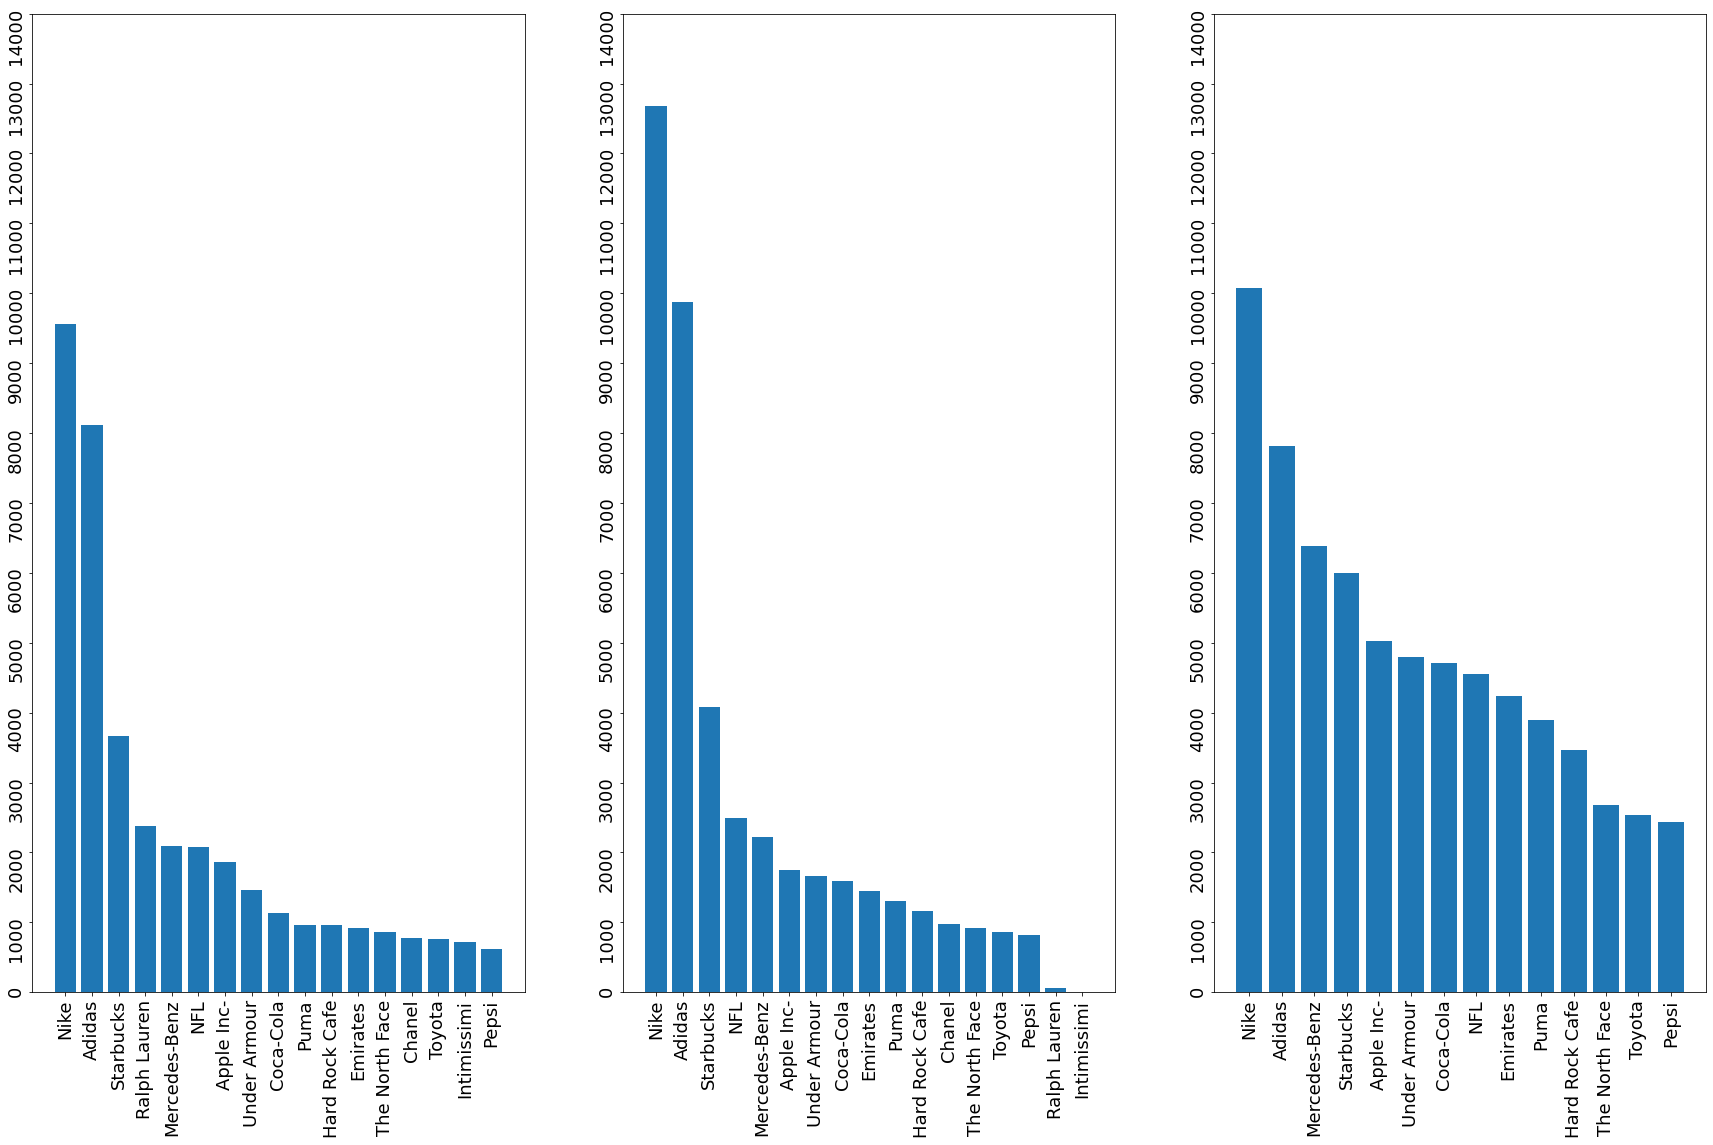

In [33]:
### PLOTS

# Brand distribution

df1 = original_counts
df2 = counts
df3 = augmented

plt.rcParams.update({'font.size': 18})


fig, axs = plt.subplots(1, 3, figsize=(30, 18))

ax = axs[0]
ax.bar(x=df1.brand, height=df1.train_logos)
ax.set_yticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

ax = axs[1]
ax.bar(x=df2.brand, height=df2.logos)
ax.set_yticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

ax = axs[2]
ax.bar(x=df3.brand, height=df3.train_logos)
ax.set_yticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

plt.savefig('Plots/brand_distribution_vertical.jpg', dpi=900)
plt.show()

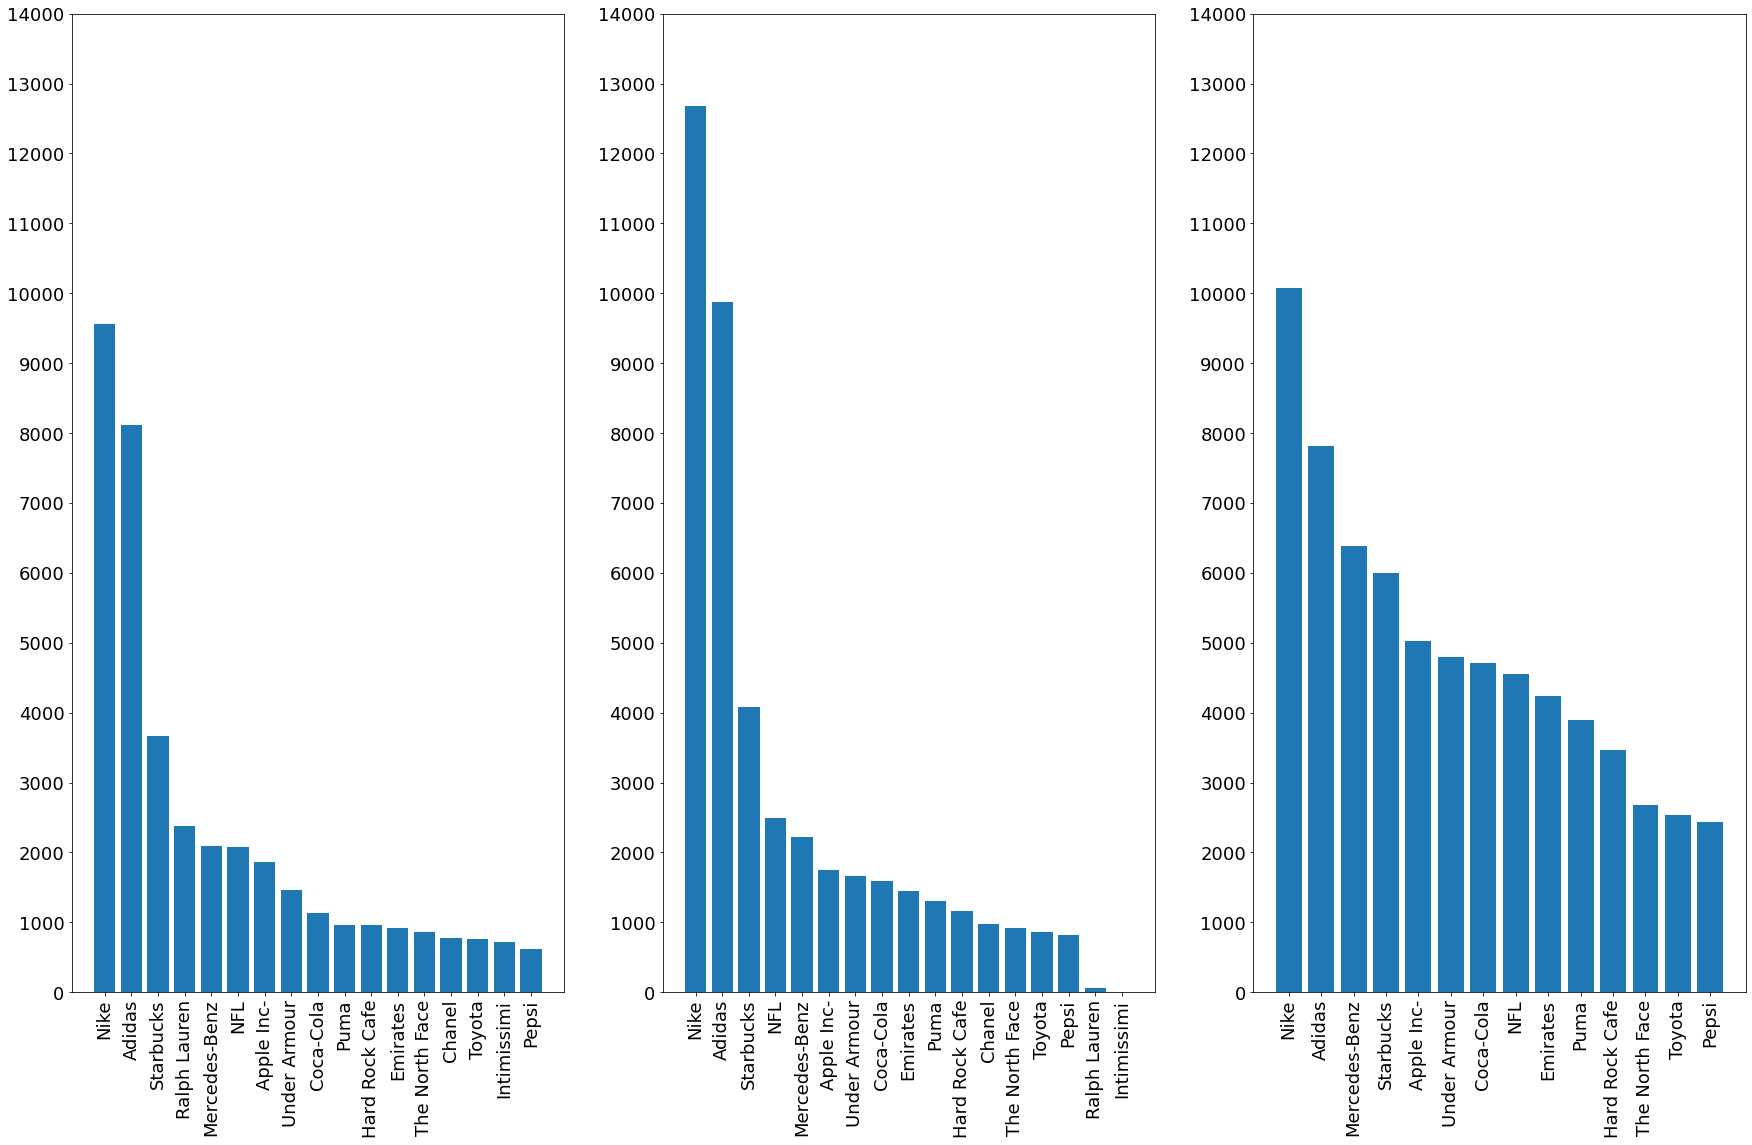

In [34]:
# Brand distribution

df1 = original_counts
df2 = counts
df3 = augmented

plt.rcParams.update({'font.size': 18})


fig, axs = plt.subplots(1, 3, figsize=(30, 18))

ax = axs[0]
ax.bar(x=df1.brand, height=df1.train_logos)
ax.set_yticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')

ax = axs[1]
ax.bar(x=df2.brand, height=df2.logos)
ax.set_yticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')

ax = axs[2]
ax.bar(x=df3.brand, height=df3.train_logos)
ax.set_yticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')

plt.savefig('Plots/brand_distribution_vertical_2.jpg', dpi=900)
plt.show()

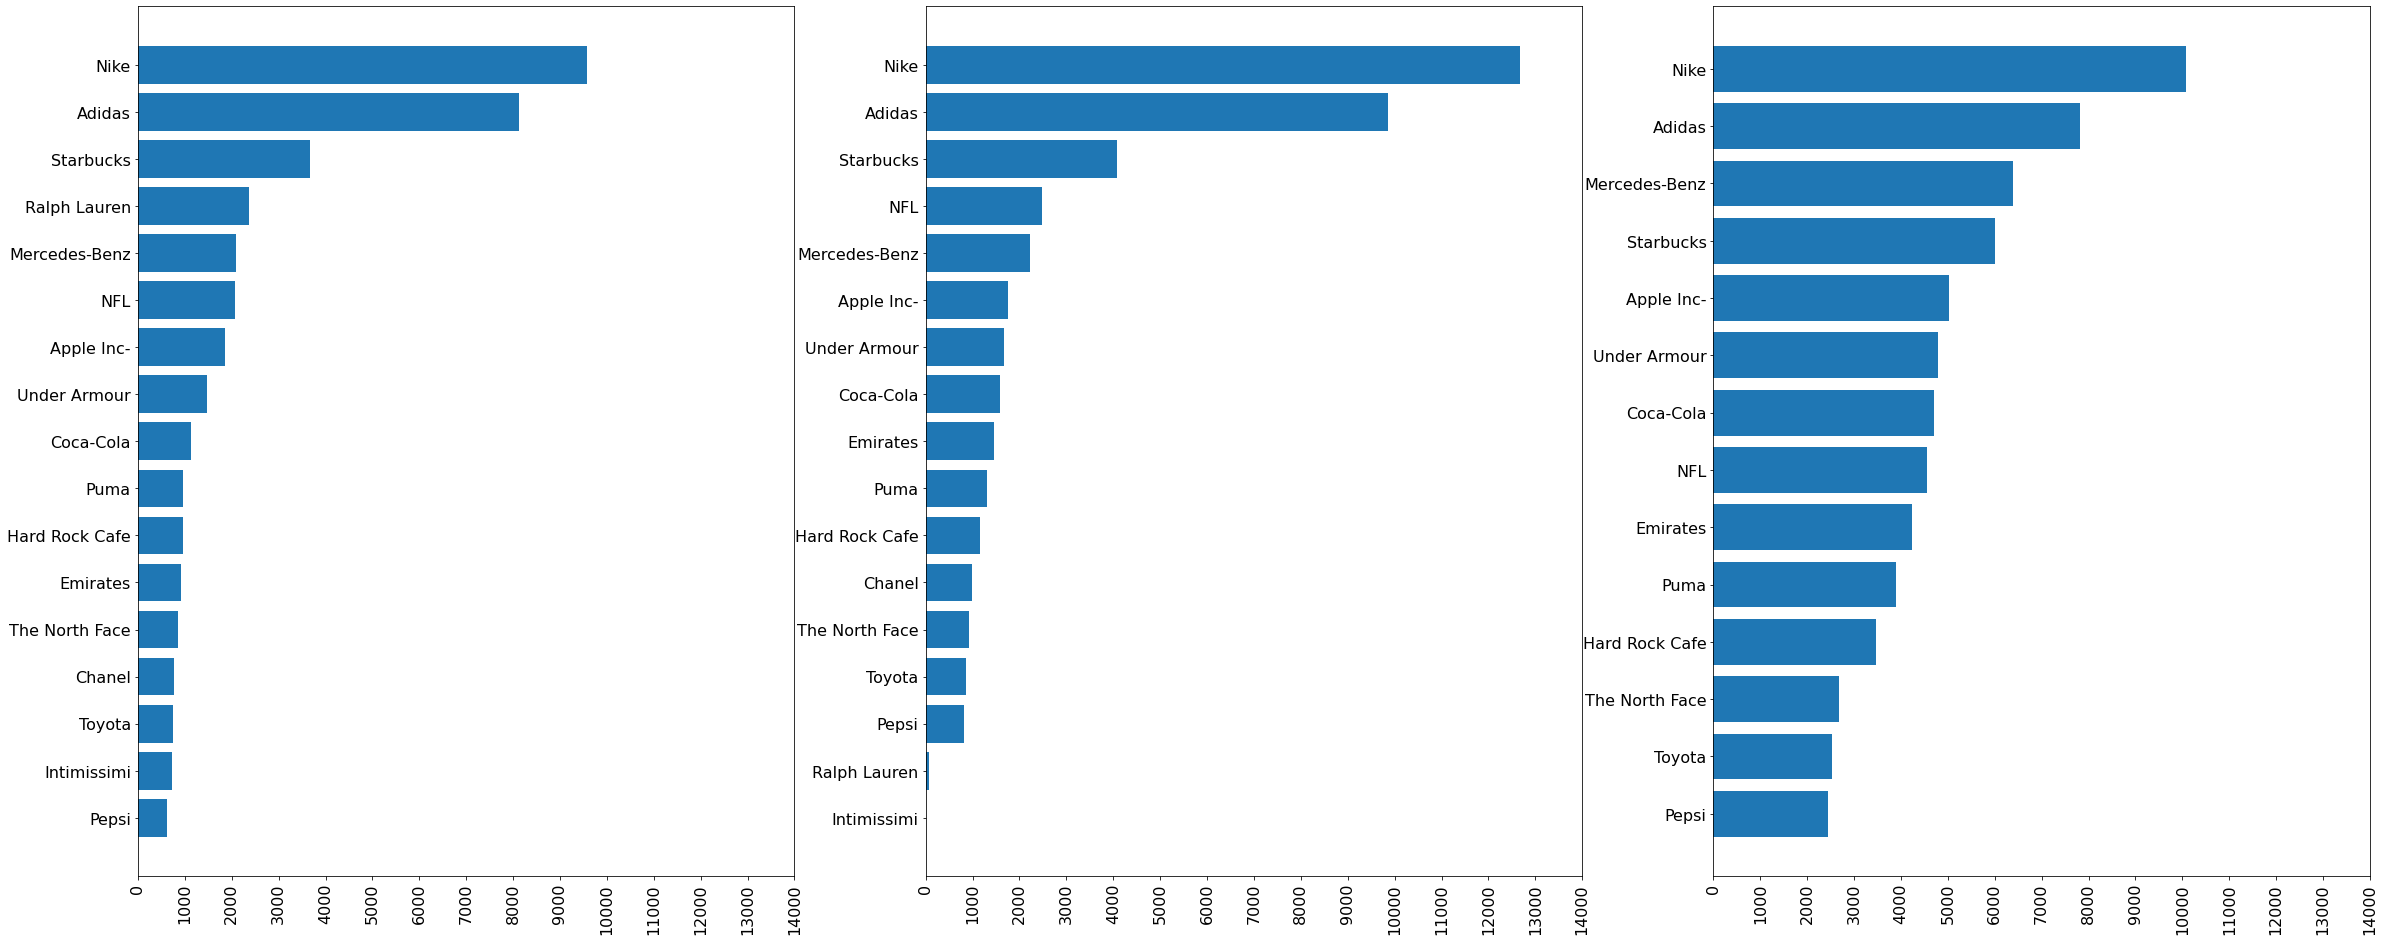

In [35]:
# Brand Distribution

df1 = original_counts.sort_values(by='train_logos', ascending=True)
df2 = counts.sort_values(by='logos', ascending=True)
df3 = augmented.sort_values(by='train_logos', ascending=True)

plt.rcParams.update({'font.size': 16})


fig, axs = plt.subplots(1, 3, figsize=(40, 16))

ax = axs[0]
ax.barh(y=df1.brand, width=df1.train_logos)
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')

ax = axs[1]
ax.barh(y=df2.brand, width=df2.logos)
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')

ax = axs[2]
ax.barh(y=df3.brand, width=df3.train_logos)
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')

plt.savefig('Plots/brand_distribution_horizontal.jpg', dpi=900)
plt.show()

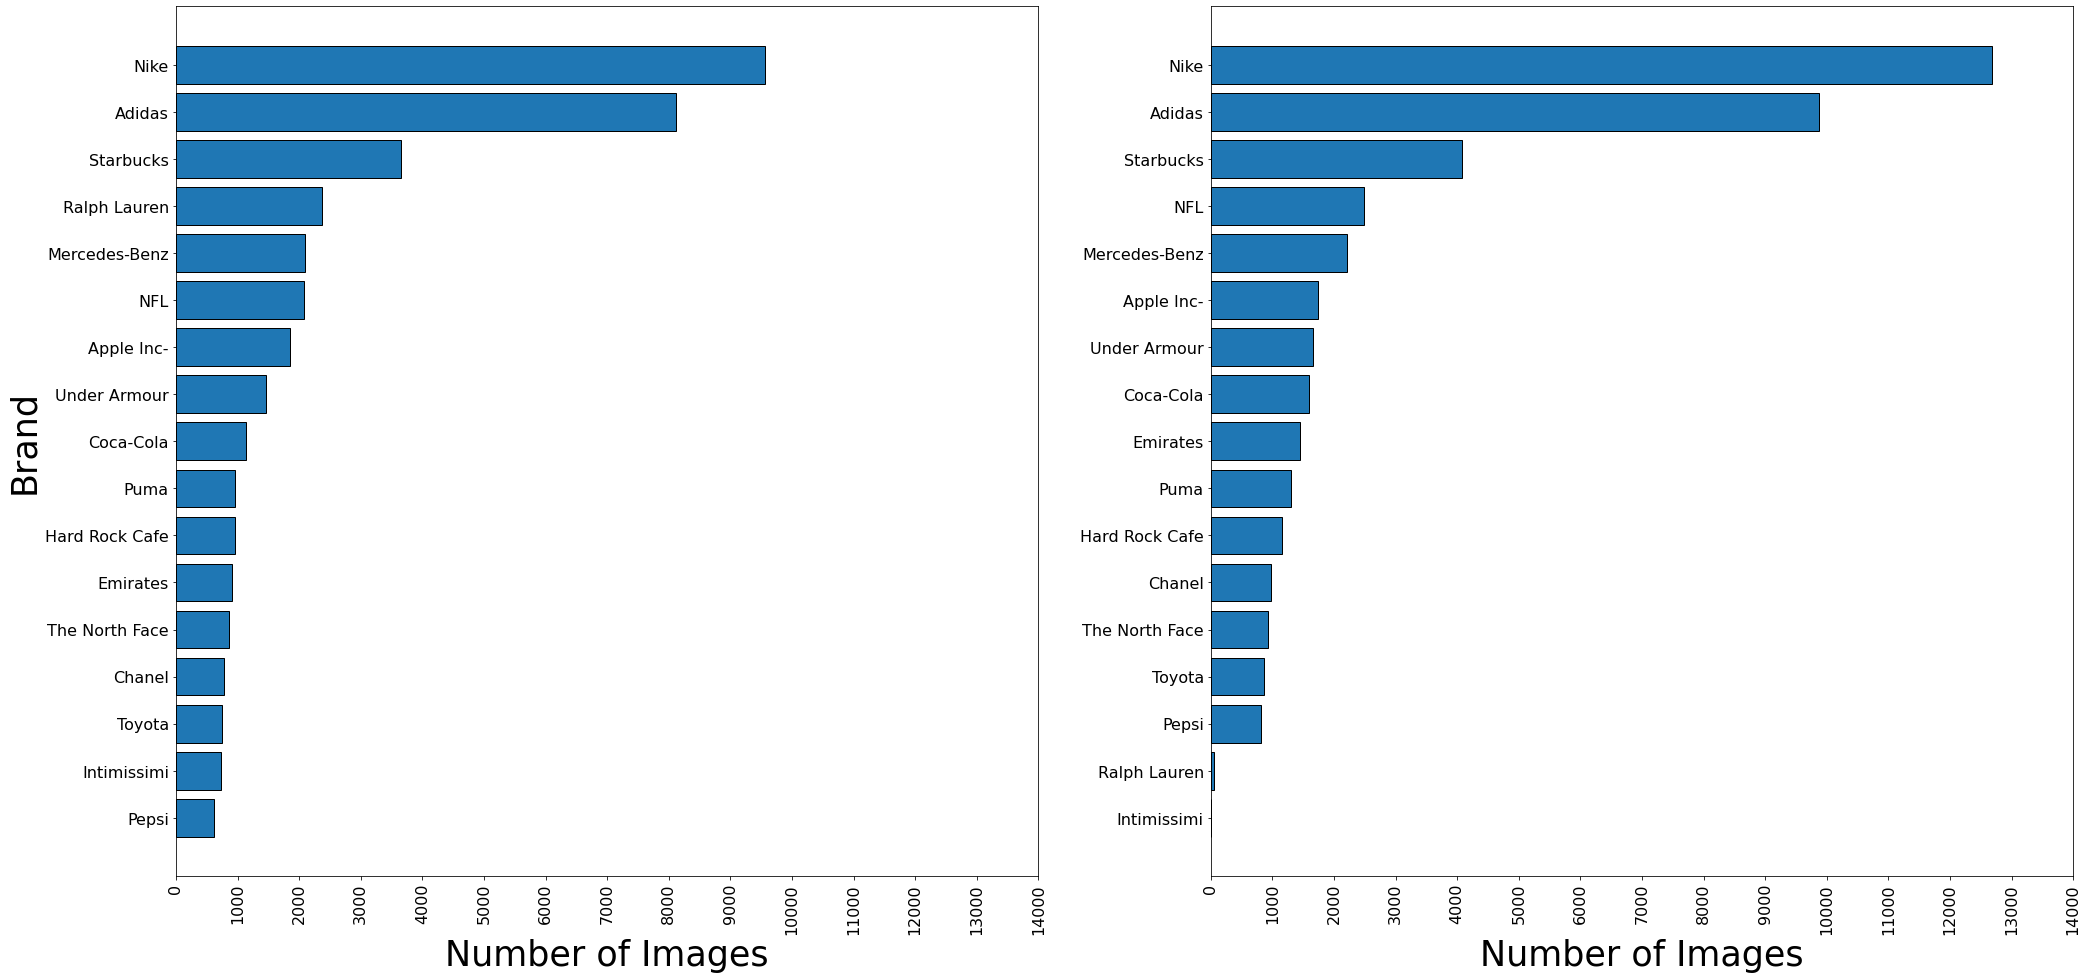

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(34, 16))

plt.rcParams.update({'font.size': 20})

# color_dict = {'Nike' : 'crimson', 'Adidas' : 'blue', 'Starbucks' : 'forestgreen', 'Ralph Lauren' : 'yellow', 'Mercedes-Benz' : 'midnightblue', 'NFL' : 'gold', 'Apple Inc-' : 'darkorange', 'Under Armour' : 'cyan', 'Coca-Cola' : 'red', 'Puma' : 'indigo', 
# 'Hard Rock Cafe' : 'royalblue', 'Emirates' : 'darkcyan', 'The North Face' : 'steelblue', 'Chanel' : 'purple', 'Toyota' : 'firebrick', 'Intimissimi' : 'lightgreen', 'Pepsi' : 'dodgerblue'}

color_list_1 = list(df1.brand)
color_list_2 = list(df2.brand)

ax = axs[0]
ax.barh(y=df1.brand, width=df1.train_logos, edgecolor='black') # color=[color_dict[brand] for brand in color_list_1]
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.xlabel("Number of Images", fontsize=35)
plt.ylabel("Brand", fontsize=35)


ax = axs[1]
ax.barh(y=df2.brand, width=df2.logos, edgecolor='black') # color=[color_dict[brand] for brand in color_list_2]
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.xlabel("Number of Images", fontsize=35)


plt.savefig('Plots/brand_distribution_horizontal_1.jpg', dpi=900)
plt.show()

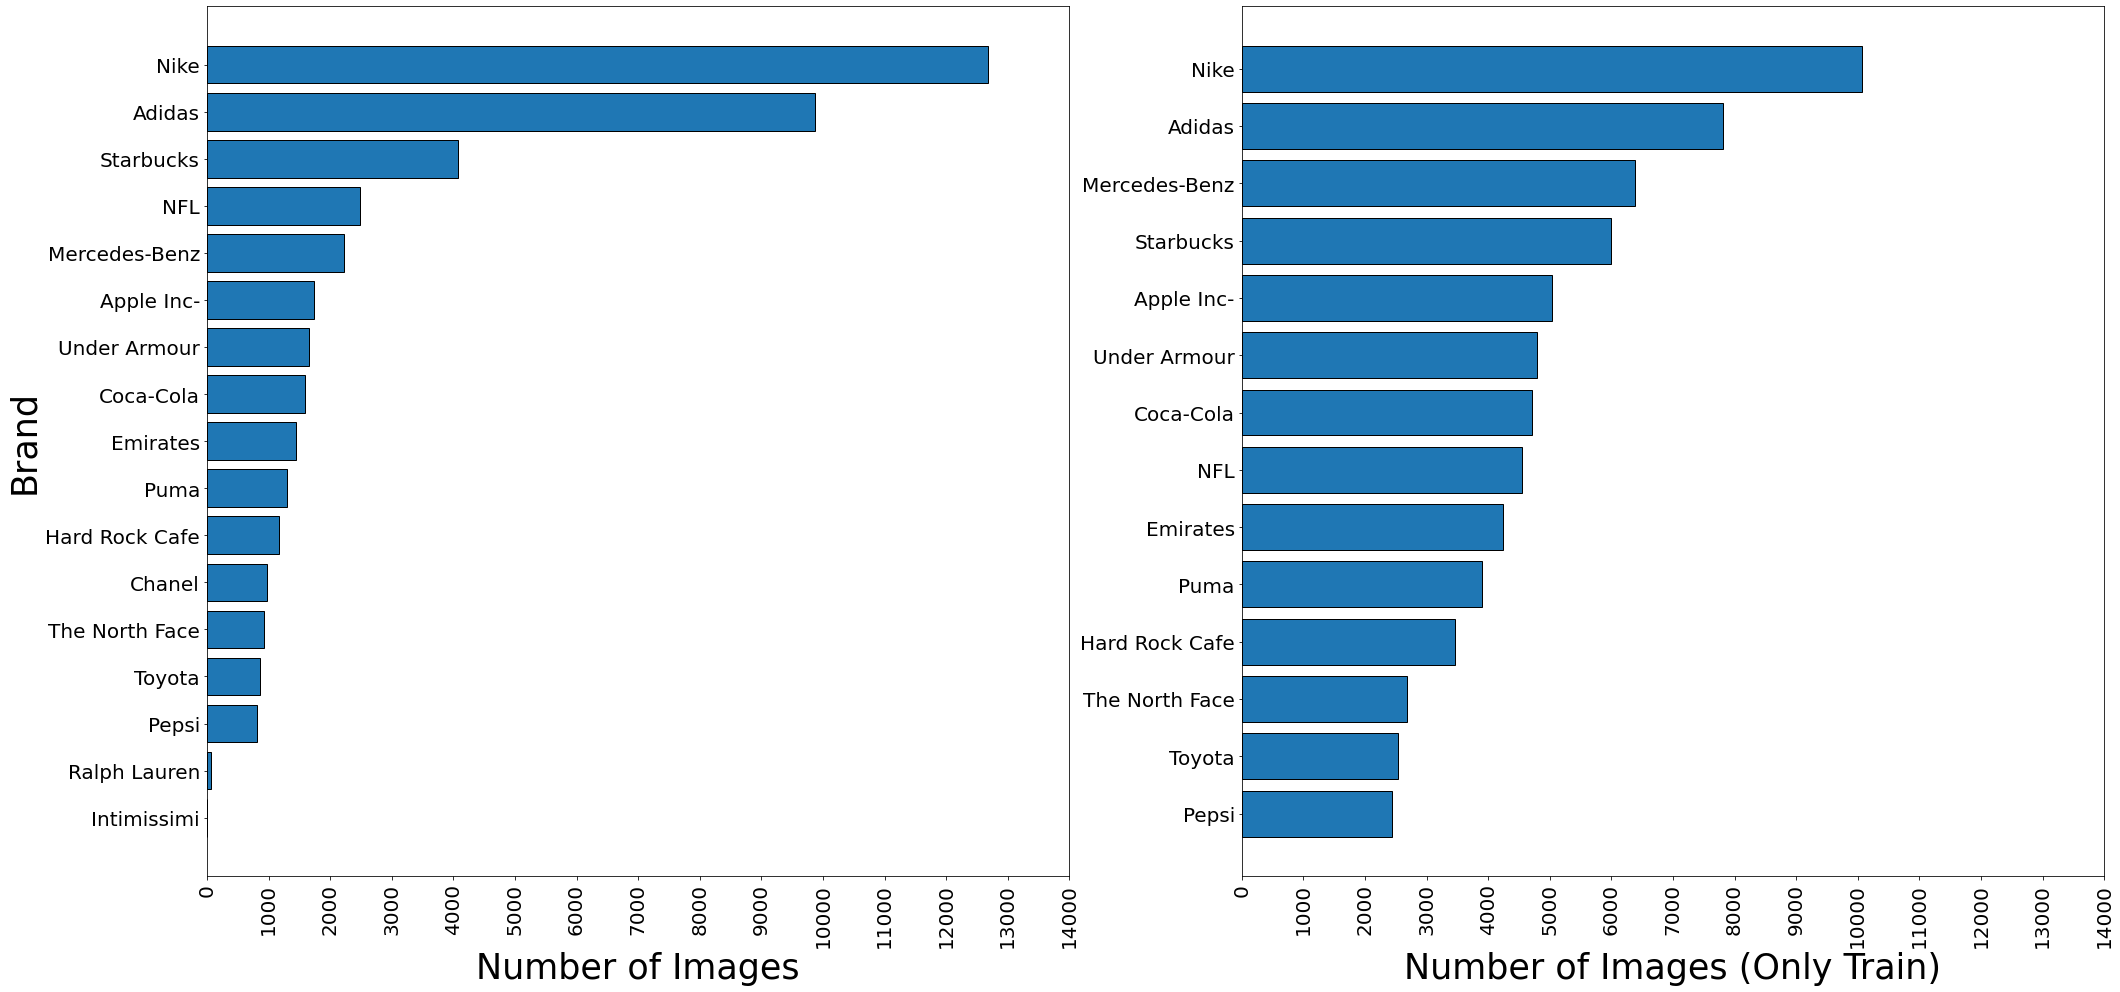

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(34, 16))

plt.rcParams.update({'font.size': 20})

# color_dict = {'Nike' : 'crimson', 'Adidas' : 'blue', 'Starbucks' : 'forestgreen', 'Ralph Lauren' : 'yellow', 'Mercedes-Benz' : 'midnightblue', 'NFL' : 'gold', 'Apple Inc-' : 'darkorange', 'Under Armour' : 'cyan', 'Coca-Cola' : 'red', 'Puma' : 'indigo', 
# 'Hard Rock Cafe' : 'royalblue', 'Emirates' : 'darkcyan', 'The North Face' : 'steelblue', 'Chanel' : 'purple', 'Toyota' : 'firebrick', 'Intimissimi' : 'lightgreen', 'Pepsi' : 'dodgerblue'}

color_list_2 = list(df2.brand)
color_list_3 = list(df3.brand)

ax = axs[0]
ax.barh(y=df2.brand, width=df2.logos, edgecolor='black') # color=[color_dict[brand] for brand in color_list_2]
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.xlabel("Number of Images", fontsize=35)
plt.ylabel("Brand", fontsize=35)

ax = axs[1]
ax.barh(y=df3.brand, width=df3.train_logos, edgecolor='black') # color=[color_dict[brand] for brand in color_list_3]
ax.set_xticks(np.arange(0, 15000, 1000))
plt.sca(ax)
plt.xticks(rotation='vertical')
plt.xlabel("Number of Images (Only Train)", fontsize=35)

plt.savefig('Plots/brand_distribution_horizontal_2.jpg', dpi=900)
plt.show()

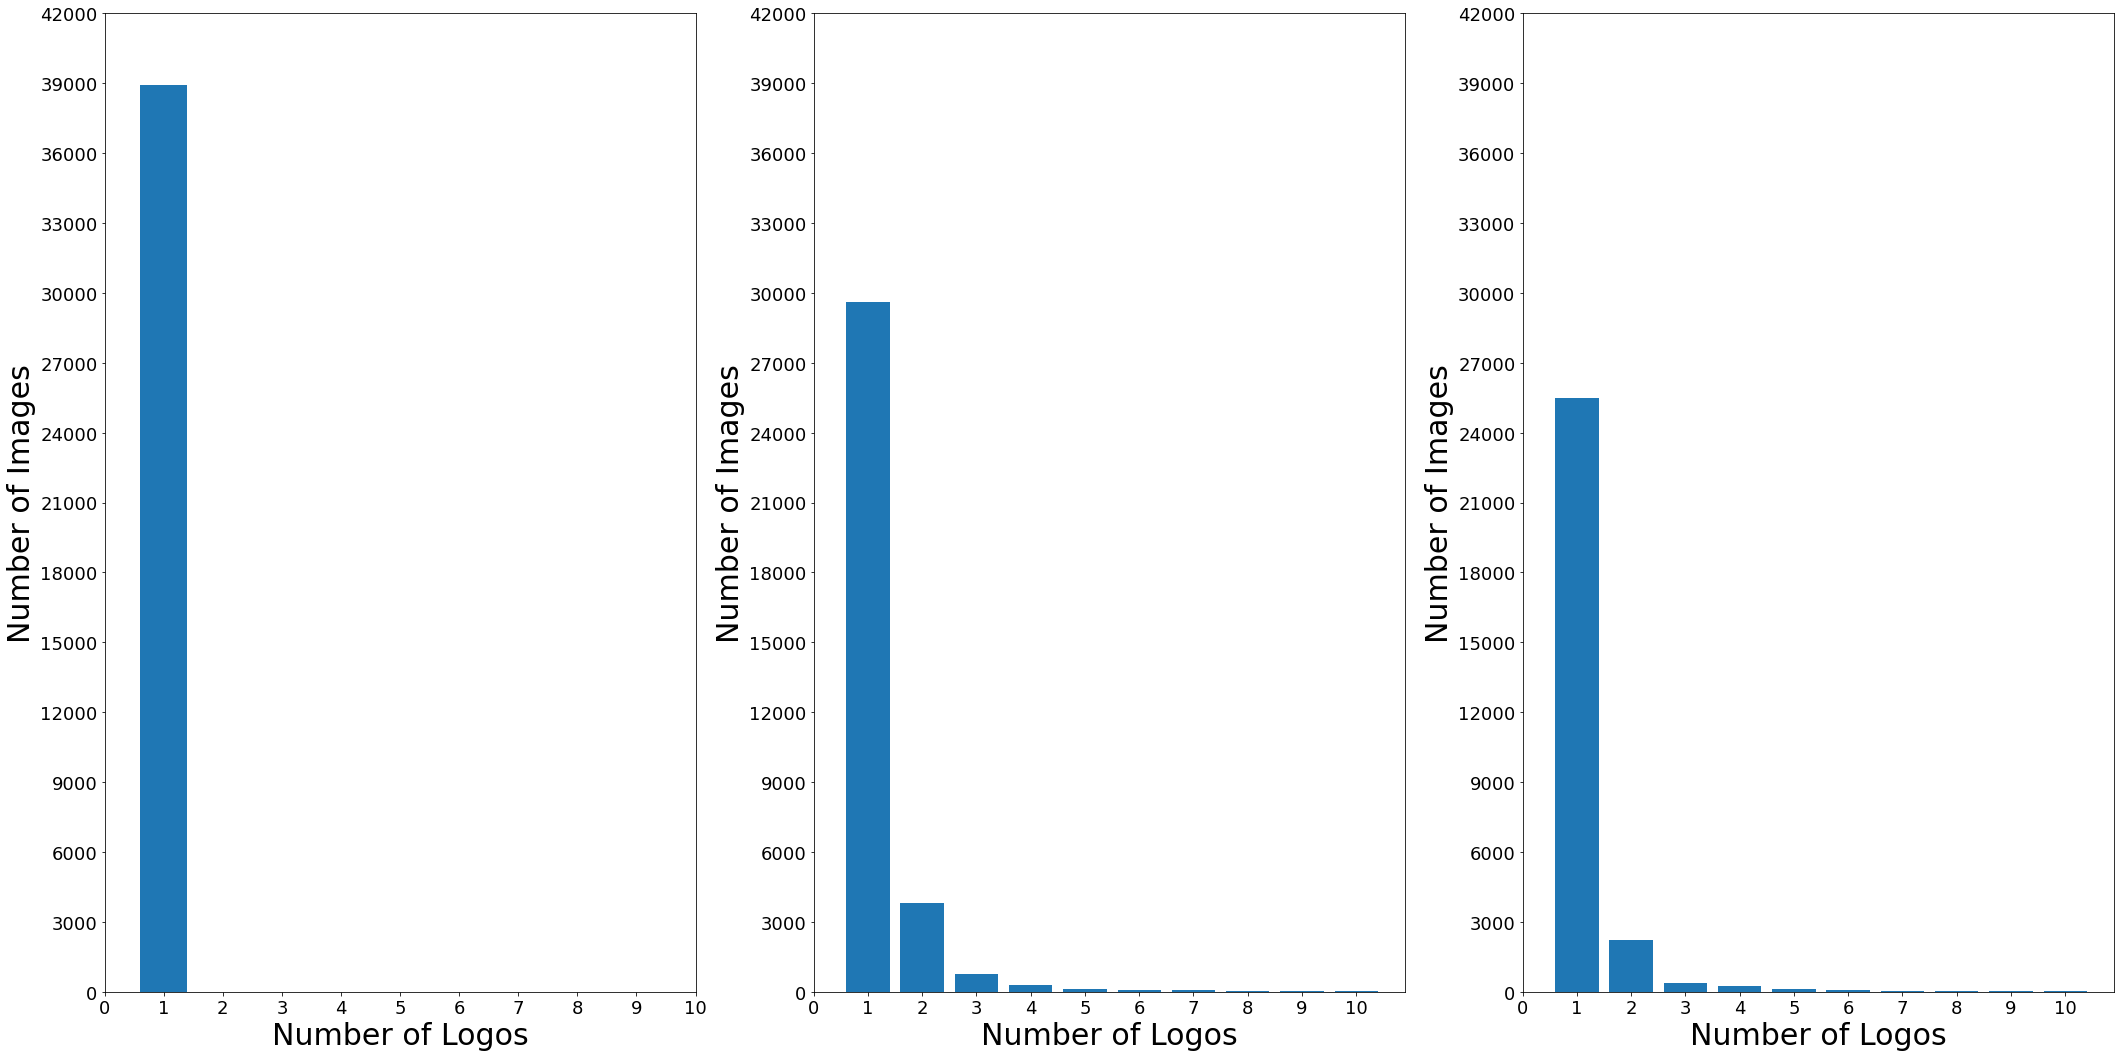

In [38]:
# Logo Distribution

df1 = original_logos
df2 = logos.head(10)
df3 = train_aug_logos.head(10)

plt.rcParams.update({'font.size': 18})


fig, axs = plt.subplots(1, 3, figsize=(36, 18))

ax = axs[0]
ax.bar(x=df1.n_logos, height=df1.imgs)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 42001, 3000))
plt.sca(ax)
plt.xticks(rotation='horizontal')
plt.xlabel("Number of Logos", fontsize=30)
plt.ylabel("Number of Images", fontsize=30)

ax = axs[1]
ax.bar(x=df2.n_logos, height=df2.imgs)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 42001, 3000))
plt.sca(ax)
plt.xticks(rotation='horizontal')
plt.xlabel("Number of Logos", fontsize=30)
plt.ylabel("Number of Images", fontsize=30)

ax = axs[2]
ax.bar(x=df3.n_logos, height=df3.train_imgs)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 42001, 3000))
plt.sca(ax)
plt.xticks(rotation='horizontal')
plt.xlabel("Number of Logos", fontsize=30)
plt.ylabel("Number of Images", fontsize=30)

plt.savefig('Plots/logos_per_image.jpg', dpi=900)
plt.show()